In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
features = list()
with open("Dataset/Features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [3]:
features[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [4]:
train_df = pd.read_csv("Dataset/train/X_train.txt", delim_whitespace = True, names = features)

In [5]:
train_df["subject_id"] = pd.read_csv("Dataset/train/subject_train.txt", header = None, squeeze = True)

In [6]:
train_df["activity"] = pd.read_csv("Dataset/train/y_train.txt", header = None, squeeze = True)

In [7]:
activity = pd.read_csv("Dataset/train/y_train.txt", header = None, squeeze = True)

In [8]:
train_df['activity_name'] = activity.map({1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LYING"})

In [9]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [10]:
train_df.shape

(7352, 564)

In [11]:
test_df = pd.read_csv("Dataset/test/X_test.txt", delim_whitespace = True, names = features)

In [12]:
test_df["subject_id"] = pd.read_csv("Dataset/test/subject_test.txt", header = None, squeeze = True)

In [13]:
test_df["activity"] = pd.read_csv("Dataset/test/y_test.txt", header = None, squeeze = True)

In [14]:
activity = pd.read_csv("Dataset/test/y_test.txt", header = None, squeeze = True)

In [15]:
test_df['activity_name'] = activity.map({1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LYING"})

In [16]:
test_df.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
280,0.362616,-0.072425,-0.121190,-0.159938,0.265328,-0.277823,-0.228349,0.297974,-0.357793,0.216303,...,-0.612983,0.547318,0.909750,-0.600122,-0.555039,0.404755,-0.002762,2,2,WALKING_UPSTAIRS
1835,0.336843,-0.073423,-0.149043,-0.301164,0.574556,-0.364684,-0.329553,0.625624,-0.391828,-0.215107,...,-0.447768,0.698645,-0.966474,-0.028790,-0.607137,0.369513,0.019216,13,2,WALKING_UPSTAIRS
66,0.339991,-0.039324,-0.113809,-0.855288,-0.886276,-0.917766,-0.878134,-0.876587,-0.932936,-0.859732,...,0.459759,0.115572,-0.047604,0.173557,0.673646,-0.542592,-0.458080,2,6,LYING
2448,0.275499,-0.000394,-0.153723,-0.965288,-0.912100,-0.898169,-0.969980,-0.915693,-0.901430,-0.895867,...,0.020536,0.672416,-0.024163,0.549596,-0.932743,0.137245,0.044722,20,4,SITTING
1880,0.277013,-0.016070,-0.106744,-0.991880,-0.959458,-0.952387,-0.992959,-0.961693,-0.951532,-0.927535,...,0.172406,-0.202737,0.923254,0.293555,-0.793169,0.236162,-0.020621,18,5,STANDING


In [17]:
test_df.shape

(2947, 564)

In [18]:
train_df.isna().sum().sum()

0

In [19]:
test_df.isna().sum().sum()

0

In [20]:
sum(train_df.duplicated())

0

In [21]:
sum(test_df.duplicated())

0

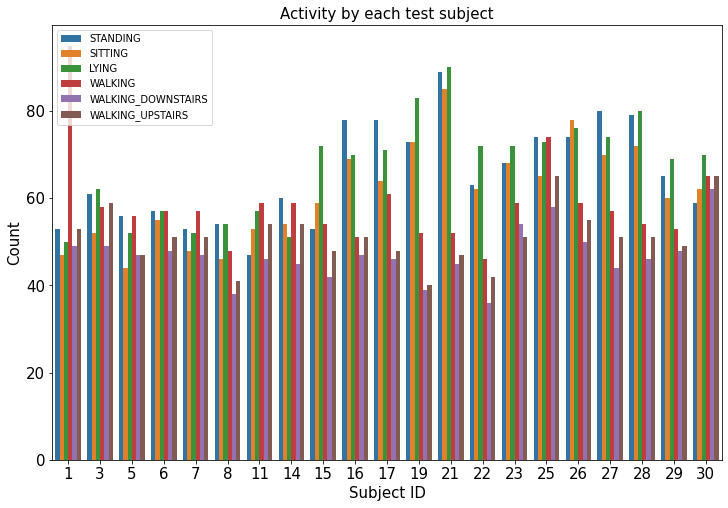

In [22]:
plt.figure(figsize = (12, 8))
plt.title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject_id", hue = "activity_name", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(loc = 'best')
plt.show()

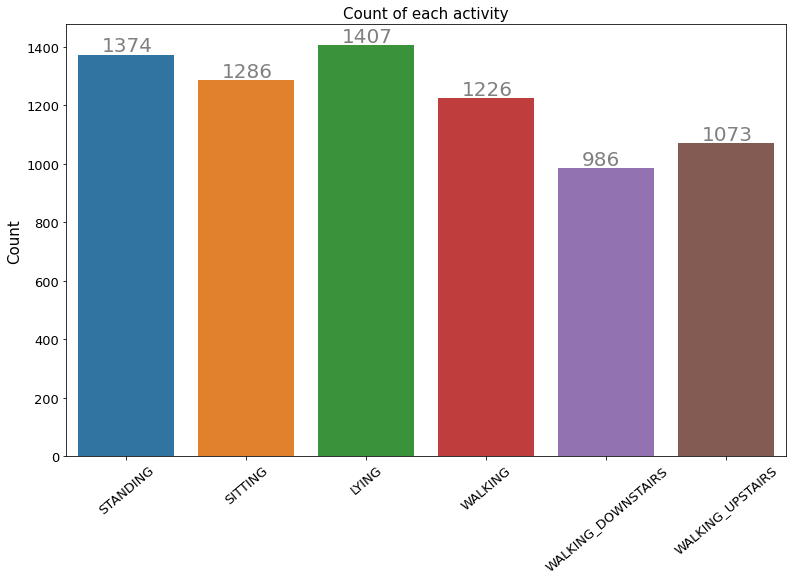

In [23]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity_name", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

In [24]:
columns = train_df.columns

In [25]:
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')

In [26]:
train_df.columns = columns
test_df.columns = columns

In [27]:
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject_id', 'activity', 'activity_name'],
      dtype='object', length=564)

In [28]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [29]:
test_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [30]:
train_df.to_csv("Dataset/train/train_df.csv", index = False)
test_df.to_csv("Dataset/test/test_df.csv", index = False)

In [31]:
train_df = pd.read_csv("Dataset/train/train_df.csv")
test_df = pd.read_csv("Dataset/test/test_df.csv")

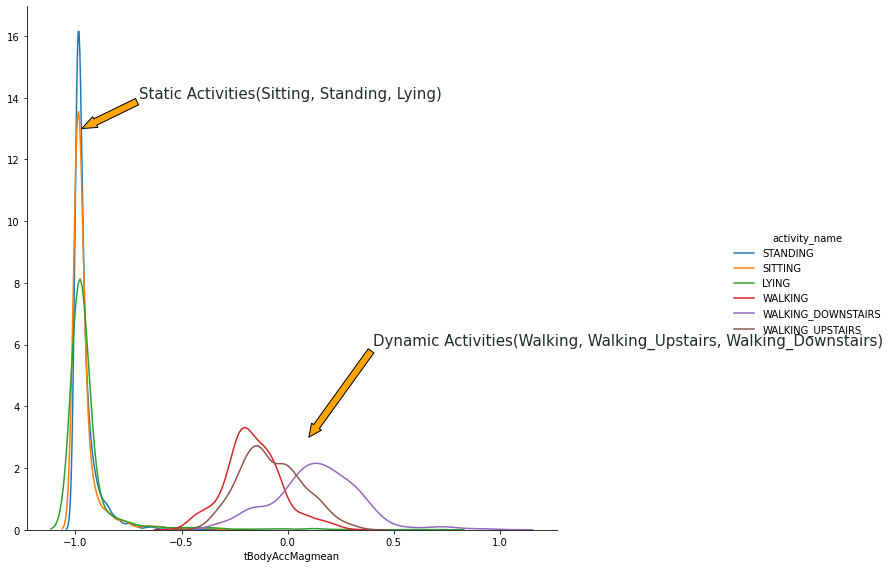

In [32]:
facetgrid = sns.FacetGrid(data = train_df, hue = "activity_name", size = 8)
facetgrid.map(sns.distplot, "tBodyAccMagmean", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 13), xytext=(-0.7, 14),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")
plt.show()

In [33]:
df_standing = train_df[train_df["activity_name"] == "STANDING"]
df_sitting = train_df[train_df["activity_name"] == "SITTING"]
df_lying = train_df[train_df["activity_name"] == "LYING"]
df_walking = train_df[train_df["activity_name"] == "WALKING"]
df_walking_upstairs = train_df[train_df["activity_name"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["activity_name"] == "WALKING_DOWNSTAIRS"]

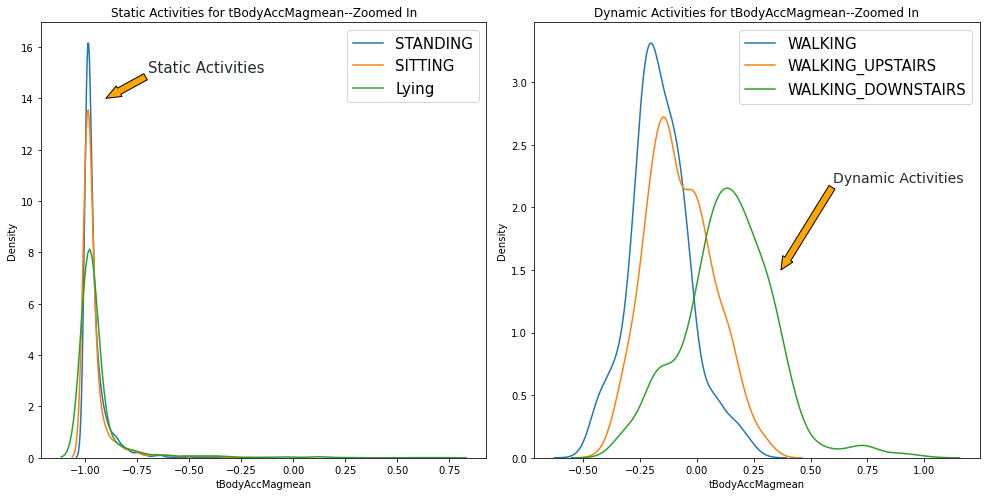

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))

axes[0].set_title("Static Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_standing["tBodyAccMagmean"], hist = False, label = "STANDING", ax = axes[0])
sns.distplot(df_sitting["tBodyAccMagmean"], hist = False, label = "SITTING", ax = axes[0])
sns.distplot(df_lying["tBodyAccMagmean"], hist = False, label = "Lying", ax = axes[0])
axes[0].legend(fontsize = 15)
axes[0].annotate('Static Activities', xy=(-0.90, 14), xytext=(-0.7, 15),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")

axes[1].set_title("Dynamic Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_walking["tBodyAccMagmean"], hist = False, label = "WALKING", ax = axes[1])
sns.distplot(df_walking_upstairs["tBodyAccMagmean"], hist = False, label = "WALKING_UPSTAIRS", ax = axes[1])
sns.distplot(df_walking_downstairs["tBodyAccMagmean"], hist = False, label = "WALKING_DOWNSTAIRS", ax = axes[1])
axes[1].legend(fontsize = 15)
axes[1].annotate('Dynamic Activities', xy=(0.37, 1.5), xytext=(0.60, 2.2),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 14, color = "#232b2b")

plt.tight_layout()
plt.show()

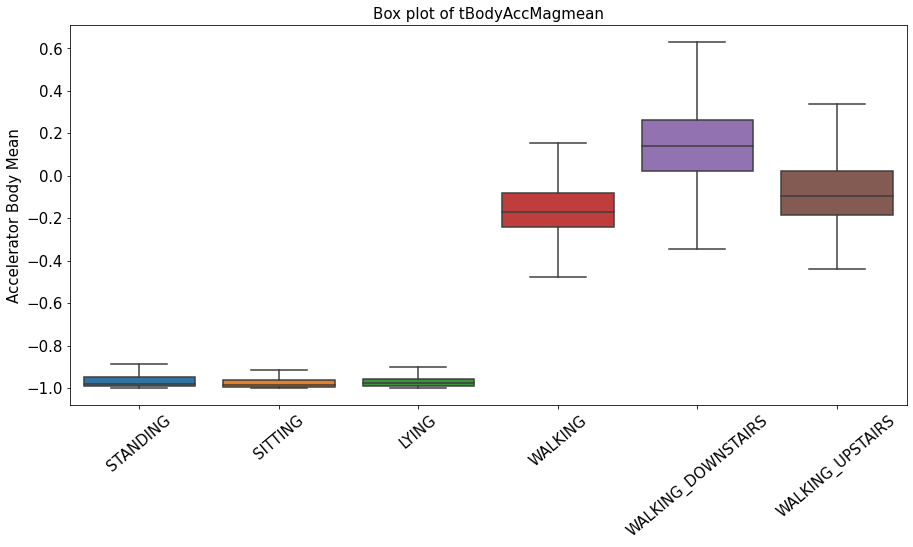

In [35]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_name", y = "tBodyAccMagmean", showfliers = False, data = train_df)
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Body Mean", fontsize = 15)
plt.xlabel("Activity Name", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

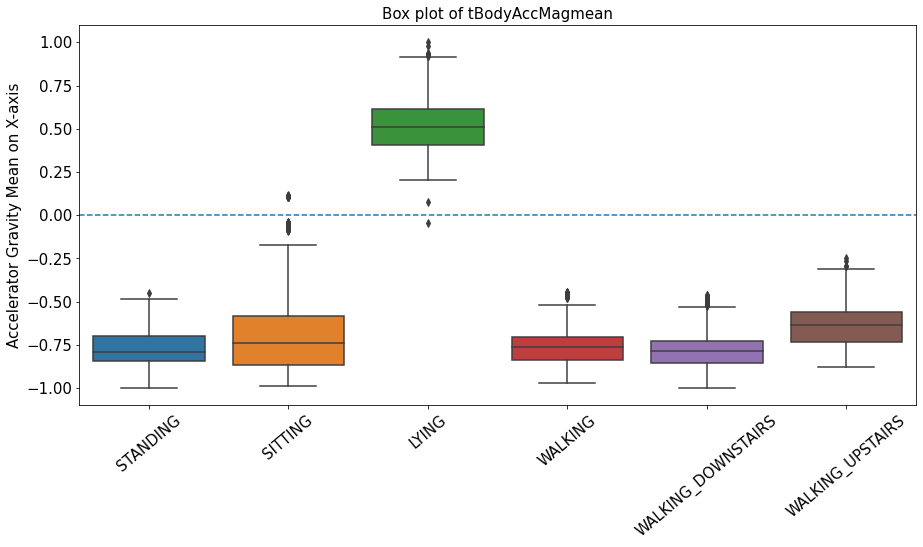

In [36]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_name", y = "angleXgravityMean", showfliers = True, data = train_df)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

In [37]:
x_train = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_train = train_df["activity"]

x_test = test_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_test = test_df["activity"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
parameters01 = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3], "penalty": ["l1", "l2"]}
clf01 = LogisticRegression(multi_class = "ovr")
cross_val01 = GridSearchCV(clf01, parameters01, cv=3)

In [40]:
cross_val01.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [41]:
predicted01 = cross_val01.predict(x_test)

In [42]:
print("Accuracy with LogisticRegression = ", np.round(accuracy_score(y_true= y_test, y_pred=predicted01)*100, 2))

Accuracy with LogisticRegression =  96.3


In [43]:
confusion_matrix(y_true=y_test, y_pred= predicted01)

array([[496,   0,   0,   0,   0,   0],
       [ 19, 451,   1,   0,   0,   0],
       [  3,   6, 411,   0,   0,   0],
       [  0,   2,   0, 420,  68,   1],
       [  1,   0,   0,   8, 523,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

In [44]:
from sklearn.svm import SVC

In [45]:
parameters02 = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
clf02 = SVC()
cross_val02 = GridSearchCV(clf02, parameters02, cv=3)

In [46]:
cross_val02.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [47]:
predicted02 = cross_val02.predict(x_test)

In [48]:
print("Accuracy with SVM = ", np.round(accuracy_score(y_true= y_test, y_pred=predicted02)*100, 2))

Accuracy with SVM =  96.54


In [49]:
confusion_matrix(y_true=y_test, y_pred= predicted02)

array([[489,   4,   3,   0,   0,   0],
       [ 16, 454,   1,   0,   0,   0],
       [  4,  18, 398,   0,   0,   0],
       [  0,   2,   0, 443,  46,   0],
       [  0,   0,   0,   8, 524,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
parameters03 = {"max_depth": [2, 3, 4, 5, 6, 7, 8]}
clf03 = DecisionTreeClassifier()
cross_val03 = GridSearchCV(clf03, parameters03, cv=3)

In [52]:
cross_val03.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]})

In [53]:
predicted03 = cross_val03.predict(x_test)

In [54]:
print("Accuracy with DecisionTree = ", np.round(accuracy_score(y_true= y_test, y_pred=predicted03)*100, 2))

Accuracy with DecisionTree =  85.61


In [55]:
confusion_matrix(y_true=y_test, y_pred= predicted03)

array([[462,   5,  29,   0,   0,   0],
       [ 43, 343,  85,   0,   0,   0],
       [ 30,  45, 345,   0,   0,   0],
       [  0,   0,   0, 347, 144,   0],
       [  0,   0,   0,  43, 489,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
parameters04 = {"n_estimators": [50, 100, 200, 400, 800]}
clf04 = RandomForestClassifier()
cross_val04 = GridSearchCV(clf04, parameters04, cv=3)

In [58]:
cross_val04.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 400, 800]})

In [59]:
predicted04 = cross_val04.predict(x_test)

In [60]:
print("Accuracy with Random Forest = ", np.round(accuracy_score(y_true= y_test, y_pred=predicted04)*100, 2))

Accuracy with Random Forest =  92.33


In [61]:
confusion_matrix(y_true= y_test, y_pred=predicted04)

array([[479,   7,  10,   0,   0,   0],
       [ 44, 420,   7,   0,   0,   0],
       [ 19,  46, 355,   0,   0,   0],
       [  0,   0,   0, 442,  49,   0],
       [  0,   0,   0,  44, 488,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
parameters05 = {"n_estimators": [50, 100], "max_depth":[1, 3]}
clf05 = GradientBoostingClassifier()
cross_val05 = GridSearchCV(clf05, parameters05, cv=3)

In [64]:
cross_val05.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 3], 'n_estimators': [50, 100]})

In [65]:
predicted05 = cross_val05.predict(x_test)

In [66]:
print("Accuracy with Gradient Boost = ", np.round(accuracy_score(y_true= y_test, y_pred=predicted04)*100, 2))

Accuracy with Gradient Boost =  92.33


In [67]:
confusion_matrix(y_true = y_test, y_pred = predicted05)

array([[487,   3,   6,   0,   0,   0],
       [ 41, 415,   5,   9,   1,   0],
       [ 30,  40, 349,   0,   1,   0],
       [  0,   5,   0, 402,  84,   0],
       [  0,   5,   0,  41, 486,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

## LSTM

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [3]:
all_signals_list = ["body_acc_x_", "body_acc_y_", "body_acc_z_", "body_gyro_x_", "body_gyro_y_", "body_gyro_z_", 
                   "total_acc_x_", "total_acc_y_", "total_acc_z_"]

In [4]:
def reading_data(filename):
    return pd.read_csv(filename, delim_whitespace = True, header = None)

In [5]:
def total_signal_matrix(trainOrTest):
    complete_data = []
    for signal in all_signals_list:
        complete_data.append(reading_data("Dataset/"+ trainOrTest +"/Inertial Signals/"+ signal + trainOrTest +".txt").values)
    return np.transpose(complete_data, (1, 2, 0))

In [6]:
def load_labels(subset):
    filename = "Dataset/"+subset+"/y_"+subset+".txt"
    y = reading_data(filename)
    return pd.get_dummies(y[0]).values

In [7]:
def load_full_data():
    x_train = total_signal_matrix("train")
    y_train = load_labels("train")
    x_test = total_signal_matrix("test")
    y_test = load_labels("test")
    return x_train, y_train, x_test, y_test

In [8]:
x_train, y_train, x_test, y_test = load_full_data()

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 128, 9), (7352, 6), (2947, 128, 9), (2947, 6))

In [10]:
np.save("Dataset/nptrain", x_train)
np.save("Dataset/nptrain_label", y_train)
np.save("Dataset/nptest", x_test)
np.save("Dataset/nptest_label", y_test)

In [11]:
def data():
    x_train = np.load("Dataset/nptrain.npy")
    y_train = np.load("Dataset/nptrain_label.npy")
    x_test = np.load("Dataset/nptest.npy")
    y_test = np.load("Dataset/nptest_label.npy")
    return x_train, y_train, x_test, y_test

In [12]:
def count_unique_classes(y_train):
    return len(set([tuple(a) for a in y_train]))

In [13]:
def create_model(x_train, y_train, x_test, y_test):
    
    epochs = 8
    batch_size = 32
    timesteps = x_train.shape[1]
    input_dim = len(x_train[0][0])
    n_classes = 6
    
    model = Sequential()
    
    model.add(LSTM(64, return_sequences = True, input_shape = (timesteps, input_dim)))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(LSTM({{choice([32, 16])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(n_classes, activation='sigmoid'))
    
    print(model.summary())
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    result = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=2, validation_split=0.01)
    
    validation_acc = np.amax(result.history['val_accuracy']) 
    
    print('Best validation acc of epoch:', validation_acc)
    
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [14]:
best_run, best_model = optim.minimize(model=create_model, data=data, algo=tpe.suggest, max_evals=4, 
                                      trials=Trials(), notebook_name = "HumanActivityRecognition")

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from datetime import datetime
except:
    pass

try:
    import warnings
except:
    pass

try:
    from sklearn.model_selection import GridSearchCV
except:
    pass

try:
    from sklearn.linear_model import LogisticRegression
except:
    pass

try:
    from sklearn.metrics import accuracy_score, confusion_matrix
except:
    pass

try:
    from sklearn.svm import SVC
except:
    pass

try:
    from sklearn.tree import DecisionTreeClassifier
except:
    pass

try:
    from sklearn.ensemble import RandomForestClassifier
except:
    pass

try:
    from sklearn.ensemble import GradientBoostingClassifier
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import LSTM
except:
    pass

try:
    from ke

Trainable params: 24,230                                                                                               
Non-trainable params: 0                                                                                                
_________________________________________________________________                                                      
None                                                                                                                   
Epoch 1/8                                                                                                              
228/228 - 21s - loss: 1.5382 - accuracy: 0.3189 - val_loss: 1.5994 - val_accuracy: 0.2297 - 21s/epoch - 92ms/step      

Epoch 2/8                                                                                                              
228/228 - 19s - loss: 1.2943 - accuracy: 0.4360 - val_loss: 1.3688 - val_accuracy: 0.2162 - 19s/epoch - 83ms/step      

Epoch 3/8                             

_________________________________________________________________                                                      
None                                                                                                                   
Epoch 1/8                                                                                                              
228/228 - 20s - loss: 0.9867 - accuracy: 0.6198 - val_loss: 0.8525 - val_accuracy: 0.7568 - 20s/epoch - 86ms/step      

Epoch 2/8                                                                                                              
228/228 - 17s - loss: 0.5796 - accuracy: 0.7916 - val_loss: 0.6771 - val_accuracy: 0.7973 - 17s/epoch - 76ms/step      

Epoch 3/8                                                                                                              
228/228 - 17s - loss: 0.4116 - accuracy: 0.8539 - val_loss: 0.4567 - val_accuracy: 0.8784 - 17s/epoch - 76ms/step      

Epoch 4/8                            

In [15]:
x_train, y_train, x_test, y_test = data()

score = best_model.evaluate(x_test, y_test)

93/93 [==============================] - 4s 39ms/step - loss: 0.3551 - accuracy: 0.8948


In [17]:
print("Accuracy = ", np.round((score[1]*100), 2))

Accuracy =  89.48


In [18]:
print("Best Hyper - Parameter " , best_run)

Best Hyper - Parameter  {'Dropout': 0.8518867848867172, 'Dropout_1': 0.4757178900623902, 'LSTM': 0}


In [19]:
true_labels = [np.argmax(i)+1 for i in y_test]
predicted_probs = best_model.predict(x_test)
predicted_labels = [np.argmax(i)+1 for i in predicted_probs]

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_true= true_labels, y_pred= predicted_labels)

array([[453,  26,   2,   2,  13,   0],
       [ 70, 401,   0,   0,   0,   0],
       [  3,   5, 412,   0,   0,   0],
       [  0,   1,   0, 360, 128,   2],
       [  0,   0,   0,  56, 476,   0],
       [  0,   2,   0,   0,   0, 535]], dtype=int64)